In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import kruskal

In [25]:
import os
print(os.getcwd())
nuevo_dir = '/Users/macbookair/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Universidad/Maestria/2023-2/Big Data y Machine Learning/Taller 1'
#nuevo_dir = r'C:\Users\ps.escobar\OneDrive - Universidad de los andes\Universidad\Maestria\2023-2\Big Data y Machine Learning\Taller 1'
os.chdir(nuevo_dir)
print(os.getcwd())

/Users/macbookair/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Universidad/Maestria/2023-2/Big Data y Machine Learning/Taller 1
/Users/macbookair/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Universidad/Maestria/2023-2/Big Data y Machine Learning/Taller 1


In [26]:
data = pd.read_csv('base_datos_sin_na.csv')

In [27]:
data.head()

,Unnamed: 0,age,urban,college,cotPension,cuentaPropia,depto,directorio,dsi,estrato,...,microEmpresa,sizeFirm,y_salary_m,y_salary_m_hu,sub.alimentacion,sub.transporte,sub.familiar,sub.educativo,log_y_salary_h,log_y_salary_m
0,1,36,1,1,1,0,11,4514331,0,2,...,0,5,1300000.0,6740.740723,1,2,1,2,8.815925,14.077875
1,2,51,1,0,1,0,11,4514333,0,2,...,0,3,1200000.0,5833.333496,2,1,2,2,8.671344,13.997832
2,3,45,1,0,1,0,11,4514334,0,2,...,1,2,737717.0,3073.820801,2,1,2,2,8.030677,13.511316
3,4,61,1,0,2,0,11,4514335,0,2,...,0,4,700000.0,4083.333252,2,2,2,2,8.314669,13.458836
4,5,35,1,0,1,0,11,4514338,0,2,...,0,5,1700000.0,8263.888672,2,2,1,2,9.019651,14.346139


In [28]:
data.shape

(9785, 30)

Con el objetivo de profundizar en el estudio de nuestros datos. Usaremos el enfoque de ciclo de vida propuesto por el DANE

In [29]:
#Ciclo de vida segun DANE
def ciclo_vida(age):
    if age <= 18:
        return 'adolecente'
    elif 18 <= age < 28:
        return 'joven'
    elif 29 <= age < 44:
        return 'adulto joven'
    elif 45 <= age < 59:
        
        return 'adulto maduro'
    else:
        return 'adulto mayor'

In [30]:
#Usamos las definiciones para hacer una variable categorica
data['ciclo_v'] = data['age'].apply(ciclo_vida)
data.head()

,Unnamed: 0,age,urban,college,cotPension,cuentaPropia,depto,directorio,dsi,estrato,...,sizeFirm,y_salary_m,y_salary_m_hu,sub.alimentacion,sub.transporte,sub.familiar,sub.educativo,log_y_salary_h,log_y_salary_m,ciclo_v
0,1,36,1,1,1,0,11,4514331,0,2,...,5,1300000.0,6740.740723,1,2,1,2,8.815925,14.077875,adulto joven
1,2,51,1,0,1,0,11,4514333,0,2,...,3,1200000.0,5833.333496,2,1,2,2,8.671344,13.997832,adulto maduro
2,3,45,1,0,1,0,11,4514334,0,2,...,2,737717.0,3073.820801,2,1,2,2,8.030677,13.511316,adulto maduro
3,4,61,1,0,2,0,11,4514335,0,2,...,4,700000.0,4083.333252,2,2,2,2,8.314669,13.458836,adulto mayor
4,5,35,1,0,1,0,11,4514338,0,2,...,5,1700000.0,8263.888672,2,2,1,2,9.019651,14.346139,adulto joven


In [31]:
#Usamos la var categorica para crear dummies
#No eliminamos una categoria, pero luego toca hacerlo
data = pd.get_dummies(data, columns = ['ciclo_v'])
data.head()

,Unnamed: 0,age,urban,college,cotPension,cuentaPropia,depto,directorio,dsi,estrato,...,sub.alimentacion,sub.transporte,sub.familiar,sub.educativo,log_y_salary_h,log_y_salary_m,ciclo_v_adulto joven,ciclo_v_adulto maduro,ciclo_v_adulto mayor,ciclo_v_joven
0,1,36,1,1,1,0,11,4514331,0,2,...,1,2,1,2,8.815925,14.077875,True,False,False,False
1,2,51,1,0,1,0,11,4514333,0,2,...,2,1,2,2,8.671344,13.997832,False,True,False,False
2,3,45,1,0,1,0,11,4514334,0,2,...,2,1,2,2,8.030677,13.511316,False,True,False,False
3,4,61,1,0,2,0,11,4514335,0,2,...,2,2,2,2,8.314669,13.458836,False,False,True,False
4,5,35,1,0,1,0,11,4514338,0,2,...,2,2,1,2,9.019651,14.346139,True,False,False,False


In [32]:
data['ciclo_v'] = data['age'].apply(ciclo_vida)
data.head()

,Unnamed: 0,age,urban,college,cotPension,cuentaPropia,depto,directorio,dsi,estrato,...,sub.transporte,sub.familiar,sub.educativo,log_y_salary_h,log_y_salary_m,ciclo_v_adulto joven,ciclo_v_adulto maduro,ciclo_v_adulto mayor,ciclo_v_joven,ciclo_v
0,1,36,1,1,1,0,11,4514331,0,2,...,2,1,2,8.815925,14.077875,True,False,False,False,adulto joven
1,2,51,1,0,1,0,11,4514333,0,2,...,1,2,2,8.671344,13.997832,False,True,False,False,adulto maduro
2,3,45,1,0,1,0,11,4514334,0,2,...,1,2,2,8.030677,13.511316,False,True,False,False,adulto maduro
3,4,61,1,0,2,0,11,4514335,0,2,...,2,2,2,8.314669,13.458836,False,False,True,False,adulto mayor
4,5,35,1,0,1,0,11,4514338,0,2,...,2,1,2,9.019651,14.346139,True,False,False,False,adulto joven


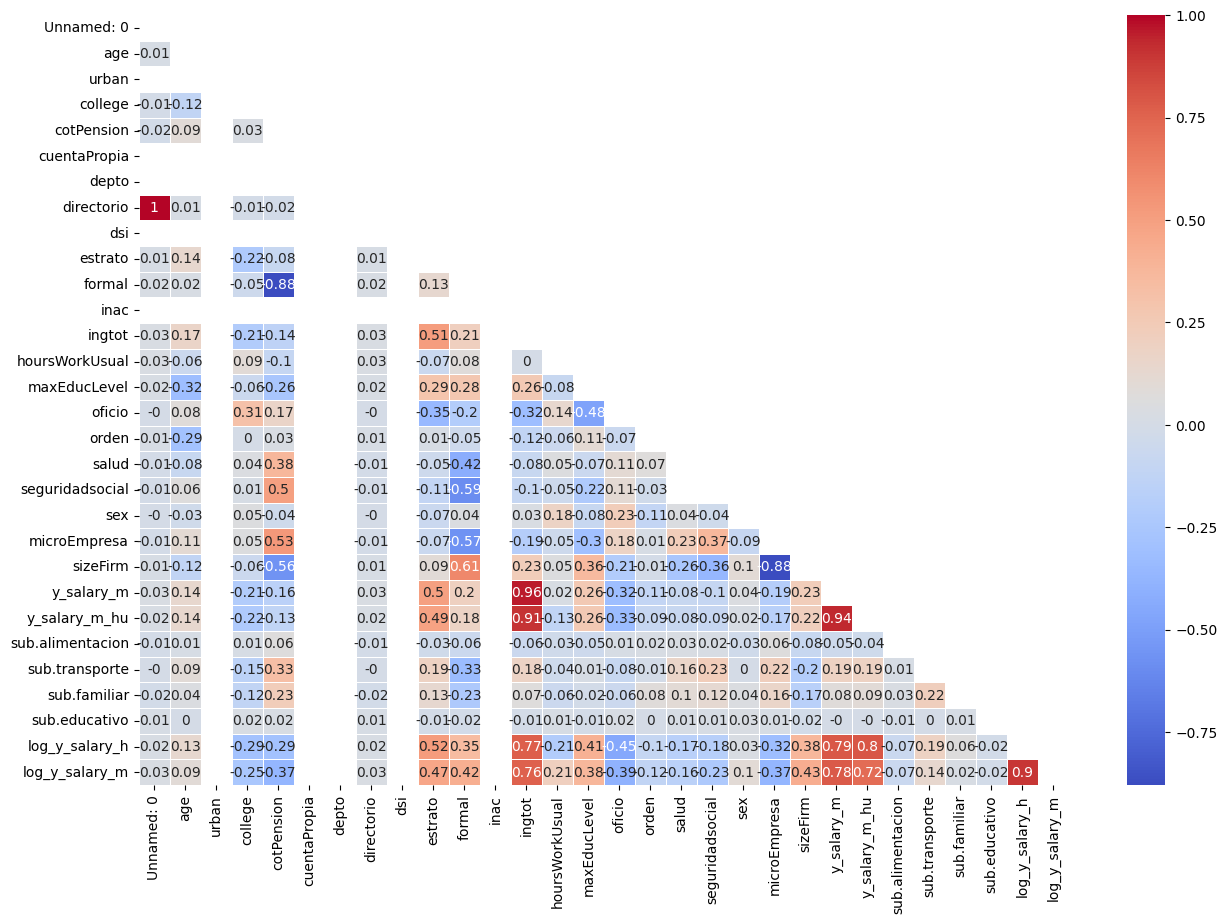

In [33]:
#Comenzamos visualizando las correlaciones entre variables
data_num = data.select_dtypes(include=['int64', 'float64'])
corm = data_num.corr().round(2)
#Redondeamos a dos decimales por temas visuales
plt.figure(figsize = (15, 10))
mask = np.triu(np.ones_like(corm, dtype = bool))
#Matriz diagonal inferior

sns.heatmap(corm, annot = True, cmap = 'coolwarm', linewidths = 0.5, mask = mask)

plt.show()

In [34]:
#Proporcion de la base por formalidad
formales = data['formal'].sum()
informales = len(data['formal']) - formales
formales_p = formales / len(data['formal'])
informales_p = 1 - formales_p
print('La proporcion de población formal es', formales_p)
print('La proporcion de población informal es', informales_p)

La proporcion de población formal es 0.7728155339805826
La proporcion de población informal es 0.22718446601941744


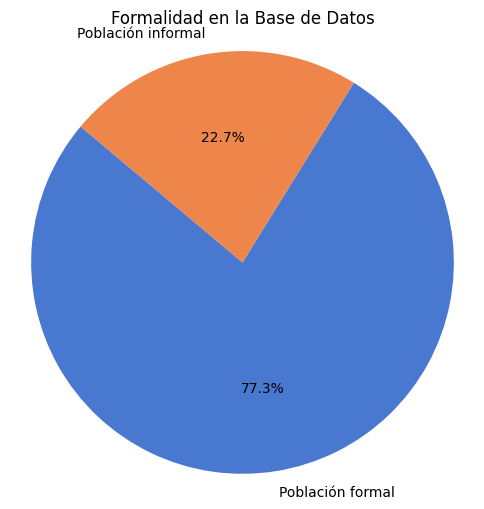

In [35]:
proporciones_formal = [formales_p, informales_p]
etiquetas = ['Población formal', 'Población informal']

sns.set_palette("muted")
plt.figure(figsize = (6, 6))
plt.pie(proporciones_formal, labels=etiquetas, autopct='%1.1f%%', startangle = 140)
plt.title('Formalidad en la Base de Datos')

plt.axis('equal')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


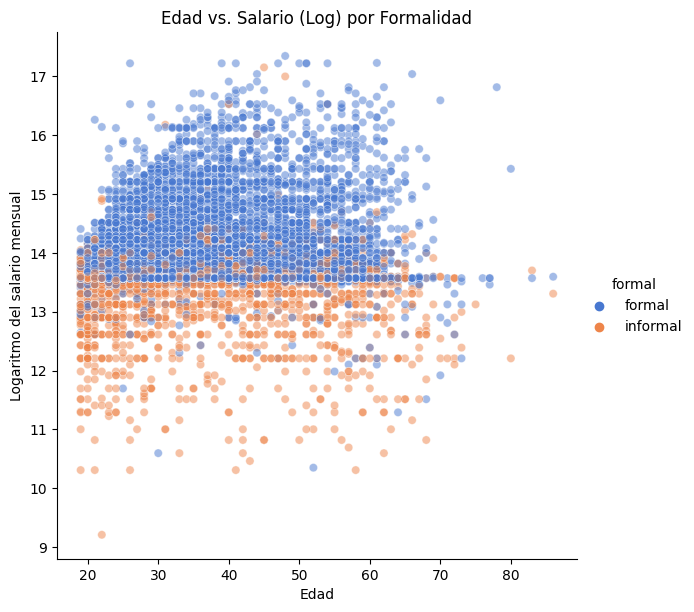

In [36]:
data['formal'] = data['formal'].replace({0: 'informal', 1: 'formal'})
plot = sns.relplot(x = "age", y = "log_y_salary_m", hue = "formal",
            alpha = 0.5, palette = "muted",
            height = 6, data = data)

plt.xlabel('Edad')
plt.ylabel('Logaritmo del salario mensual')
plt.title('Edad vs. Salario (Log) por Formalidad')

plt.show()
#Hay una división clara

In [37]:
# Test de normalidad Shapiro-Wilk
pg.normality(data = data, dv = 'log_y_salary_m', group = 'formal')
#No hay normalidad, tenemos que hacer pruebas no parametricas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
formal,,,
formal,0.834077,0.000000e+00,False
informal,0.855578,4.007714e-41,False


In [38]:
pg.anova(data = data, dv = 'log_y_salary_m', between = 'formal', detailed = True)
#p-unc bajo sugiere que al menos una de las medias es diferente de las demas
#F sugiere que al menos una de las medias es diferente de las otras
#np2 sugiere que formalidad explica la variable objetivo

,Source,SS,DF,MS,F,p-unc,np2
0,formal,963.445593,1,963.445593,2066.599345,0.0,0.174402
1,Within,4560.820299,9783,0.466199,NaN,NaN,NaN


In [39]:
dif_no_par_formal = kruskal(*[group['log_y_salary_m'] for name, group in data.groupby('formal')])
print('Estadística de prueba de Kruskal-Wallis:', dif_no_par_formal.statistic)
print('Valor p:', dif_no_par_formal.pvalue)

#Con este pvalor rechazamos la h nula
#hay diferencias significativas entre los grupos

Estadística de prueba de Kruskal-Wallis: 1682.1078358999912
Valor p: 0.0


In [40]:
#Proporcion de la base por sexo
num_hombres = data['sex'].sum()
num_mujeres = len(data['sex']) - num_hombres
proporcion_hombres = num_hombres / len(data['sex'])
proporcion_mujeres = num_mujeres / len(data['sex'])
print('La proporcion de hombres es', proporcion_hombres)
print('La proporcion de mujeres es', proporcion_mujeres)

La proporcion de hombres es 0.5017884517118038
La proporcion de mujeres es 0.4982115482881962


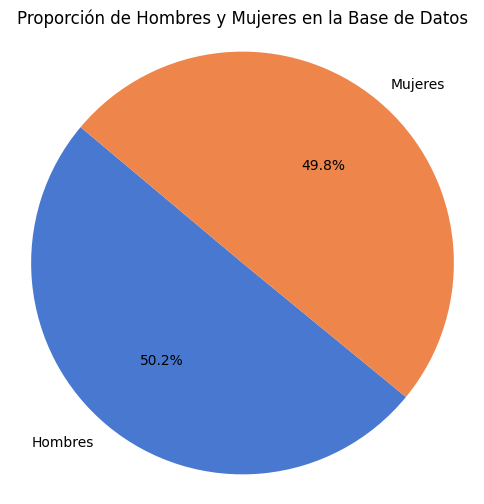

In [41]:
proporciones = [proporcion_hombres, proporcion_mujeres]
etiquetas = ['Hombres', 'Mujeres']

sns.set_palette("muted")
plt.figure(figsize = (6, 6))
plt.pie(proporciones, labels = etiquetas, autopct='%1.1f%%', startangle = 140)
plt.title('Proporción de Hombres y Mujeres en la Base de Datos')

plt.axis('equal')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Frecuencia de edades por sexo')

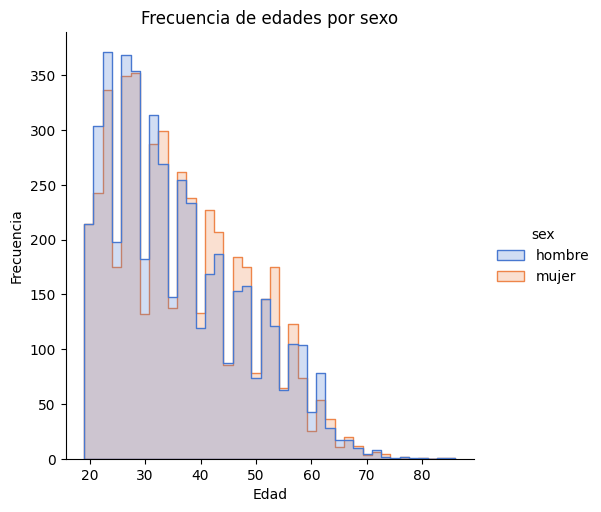

In [42]:
data['sex'] = data['sex'].replace({0: 'mujer', 1: 'hombre'})
sns.displot(data, x = "age", hue = "sex", element = "step")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades por sexo')

In [43]:
#Miremos la conformacion de grupos por edad
total = len(data['sex'])

#Adulto Mayor
adultos_mayores = data[data['ciclo_v_adulto mayor']]
adulto_mayor_t = adultos_mayores.groupby('sex').size() / total
adulto_mayor_p = adultos_mayores.groupby('sex').size() / len(adultos_mayores)

print("La proporción de los adultos mayores", adulto_mayor_p)
print("La partcipación de los adultos mayores sobre el total", adulto_mayor_t)

La proporción de los adultos mayores sex
hombre    0.520508
mujer     0.479492
dtype: float64
La partcipación de los adultos mayores sobre el total sex
hombre    0.054471
mujer     0.050179
dtype: float64


In [44]:
#Adulto Maduro
adulto_maduro = data[data['ciclo_v_adulto maduro']]
adulto_maduro_t = adulto_maduro.groupby('sex').size() / total
adulto_maduro_p = adulto_maduro.groupby('sex').size() / len(adulto_maduro)

print("La proporción de los adultos maduros", adulto_maduro_p)
print("La partcipación de los adultos maduros sobre el total", adulto_maduro_t)

La proporción de los adultos maduros sex
hombre    0.474252
mujer     0.525748
dtype: float64
La partcipación de los adultos maduros sobre el total sex
hombre    0.098825
mujer     0.109555
dtype: float64


In [45]:
#Adultos Jovenes
adulto_joven = data[data['ciclo_v_adulto joven']]
adulto_joven_t = adulto_joven.groupby('sex').size() / total
adulto_joven_p = adulto_joven.groupby('sex').size() / len(adulto_joven)

print("La proporción de los adultos jovenes", adulto_joven_p)
print("La partcipación de los adultos jovenes sobre el total", adulto_joven_t)

La proporción de los adultos jovenes sex
hombre    0.494934
mujer     0.505066
dtype: float64
La partcipación de los adultos jovenes sobre el total sex
hombre    0.199693
mujer     0.203781
dtype: float64


In [46]:
#Jovenes
joven = data[data['ciclo_v_joven']]
joven_t = joven.groupby('sex').size() / total
joven_p = joven.groupby('sex').size() / len(joven)

print("La proporción de los jovenes", joven_p)
print("La partcipación de los jovenes sobre el total", joven_t)

La proporción de los jovenes sex
hombre    0.524874
mujer     0.475126
dtype: float64
La partcipación de los jovenes sobre el total sex
hombre    0.148799
mujer     0.134696
dtype: float64


In [47]:
#Miramos el valor maximo de educación en nuestros ciclos de vida
educ = data.groupby(['sex', 'ciclo_v_joven','ciclo_v_adulto joven',
                            'ciclo_v_adulto maduro','ciclo_v_adulto mayor'])['maxEducLevel'].agg(['mean', 'std'])
print(educ)

                                                                                          mean   
sex    ciclo_v_joven ciclo_v_adulto joven ciclo_v_adulto maduro ciclo_v_adulto mayor             
hombre False         False                False                 True                  5.686679  \
                                          True                  False                 5.632885   
                     True                 False                 False                 6.084485   
       True          False                False                 False                 6.279533   
mujer  False         False                False                 True                  5.733198   
                                          True                  False                 5.725746   
                     True                 False                 False                 6.312437   
       True          False                False                 False                 6.536419   

                   

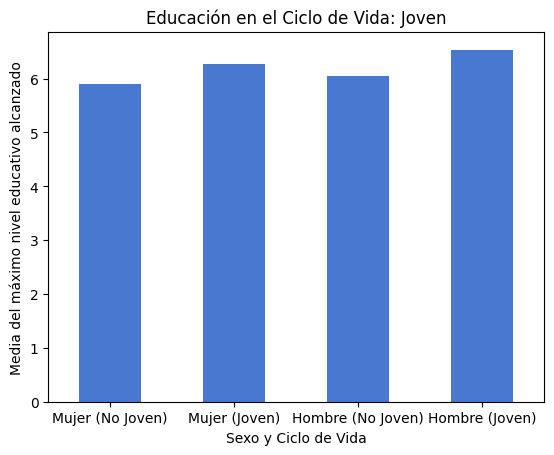

In [48]:
#Hacemos graficos por categoria
educ_j = data.groupby(['sex', 'ciclo_v_joven'])['maxEducLevel'].mean()
educ_j.plot(kind = 'bar')
x_labels = ['Mujer (No Joven)', 'Mujer (Joven)', 'Hombre (No Joven)', 'Hombre (Joven)']

educ_j.plot(kind = 'bar')
plt.xlabel('Sexo y Ciclo de Vida')
plt.ylabel('Media del máximo nivel educativo alcanzado')
plt.title('Educación en el Ciclo de Vida: Joven')
plt.xticks(range(len(x_labels)), x_labels, rotation = 0)

plt.show()

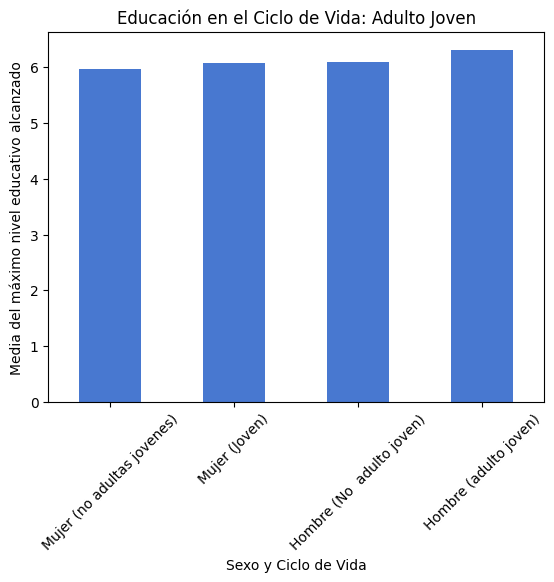

In [49]:
educ_aj = data.groupby(['sex', 'ciclo_v_adulto joven'])['maxEducLevel'].mean()
educ_aj.plot(kind = 'bar')
x_labels = (['Mujer (no adultas jovenes)', 'Mujer (Joven)', 'Hombre (No  adulto joven)', 'Hombre (adulto joven)'])

educ_aj.plot(kind = 'bar')
plt.xlabel('Sexo y Ciclo de Vida')
plt.ylabel('Media del máximo nivel educativo alcanzado')
plt.title('Educación en el Ciclo de Vida: Adulto Joven')
plt.xticks(range(len(x_labels)), x_labels, rotation = 45)

plt.show()

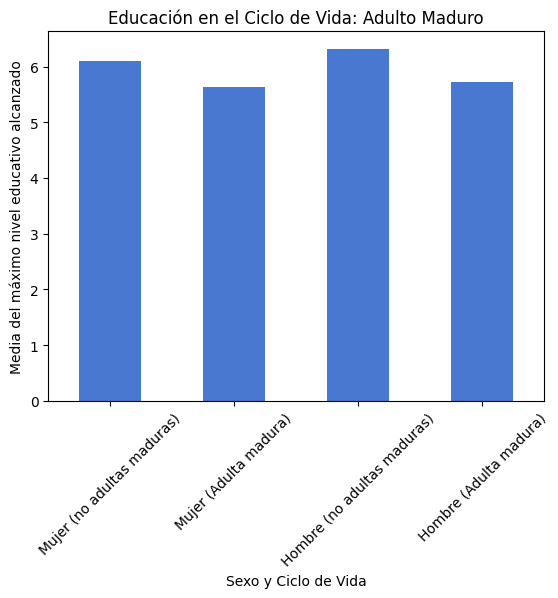

In [50]:
educ_am = data.groupby(['sex', 'ciclo_v_adulto maduro'])['maxEducLevel'].mean()
educ_am.plot(kind = 'bar')
x_labels = (['Mujer (no adultas maduras)', 'Mujer (Adulta madura)', 'Hombre (no adultas maduras)', 'Hombre (Adulta madura)'])

educ_am.plot(kind = 'bar')
plt.xlabel('Sexo y Ciclo de Vida')
plt.ylabel('Media del máximo nivel educativo alcanzado')
plt.title('Educación en el Ciclo de Vida: Adulto Maduro')
plt.xticks(range(len(x_labels)), x_labels, rotation = 45)

plt.show()

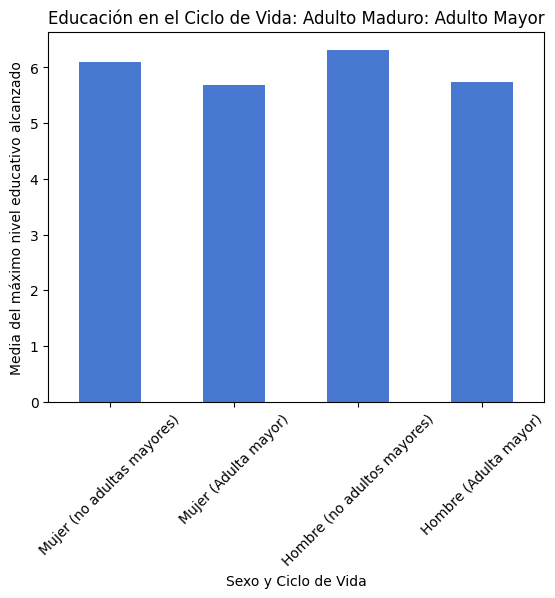

In [51]:
educ_amy = data.groupby(['sex', 'ciclo_v_adulto mayor'])['maxEducLevel'].mean()
educ_amy.plot(kind = 'bar')
x_labels = (['Mujer (no adultas mayores)', 'Mujer (Adulta mayor)', 'Hombre (no adultos mayores)', 'Hombre (Adulta mayor)'])

educ_am.plot(kind = 'bar')
plt.xlabel('Sexo y Ciclo de Vida')
plt.ylabel('Media del máximo nivel educativo alcanzado')
plt.title('Educación en el Ciclo de Vida: Adulto Maduro: Adulto Mayor')
plt.xticks(range(len(x_labels)), x_labels, rotation = 45)

plt.show()

In [52]:
# Test de normalidad Shapiro-Wilk
pg.normality(data = data, dv = 'log_y_salary_m', group = 'ciclo_v')
#No hay normalidad, tenemos que hacer pruebas no parametricas

,W,pval,normal
ciclo_v,,,
adulto joven,0.890955,0.000000e+00,False
adulto maduro,0.894667,2.972946e-35,False
adulto mayor,0.938301,3.447420e-20,False
joven,0.844485,0.000000e+00,False


In [53]:
pg.anova(data = data, dv = 'log_y_salary_m', between = 'ciclo_v', detailed = True)
#p-unc bajo sugiere que al menos una de las medias es diferente de las demas
#F sugiere que al menos una de las medias es diferente de las otras
#np2 sugiere que ciclo_v explica la variable objetivo

,Source,SS,DF,MS,F,p-unc,np2
0,ciclo_v,174.076037,3,58.025346,106.079582,1.391533e-67,0.031511
1,Within,5350.189855,9781,0.546998,NaN,NaN,NaN


In [54]:
dif_no_par_ciclo = kruskal(*[group['log_y_salary_m'] for name, group in data.groupby('ciclo_v')])
print('Estadística de prueba de Kruskal-Wallis:', dif_no_par_ciclo.statistic)
print('Valor p:', dif_no_par_ciclo.pvalue)

#Con este pvalor rechazamos la h nula
#hay diferencias significativas entre al menos un de los grupos

Estadística de prueba de Kruskal-Wallis: 270.21702158102505
Valor p: 2.7702189555907844e-58


count    9784.000000
mean        6.097608
std         1.109915
min         1.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: maxEducLevel, dtype: float64


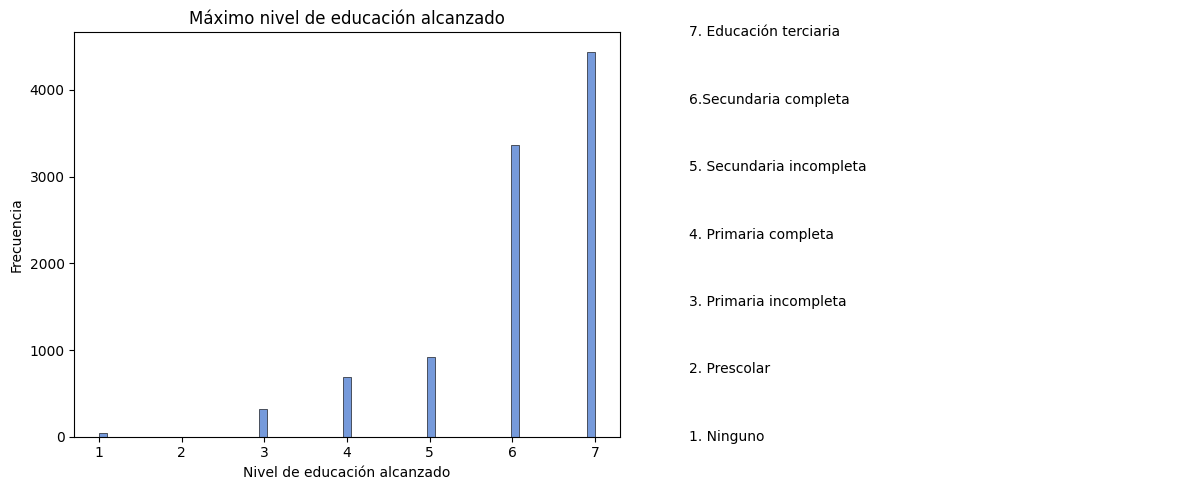

In [55]:
print(data['maxEducLevel'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data, x = "maxEducLevel", ax = axs[0])
axs[0].set_xlabel('Nivel de educación alcanzado')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Máximo nivel de educación alcanzado')

convenciones = {
    1: '1. Ninguno',
    2: '2. Prescolar',
    3: '3. Primaria incompleta',
    4: '4. Primaria completa',
    5: '5. Secundaria incompleta',
    6: '6.Secundaria completa',
    7: '7. Educación terciaria'
}

for nivel, label in convenciones.items():
    axs[1].text(0.1, nivel, label, ha='left', va='center')

axs[1].axis('off')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(1, 7)

plt.tight_layout()
plt.show()

In [56]:
data.groupby(['sex', 'ciclo_v_joven','ciclo_v_adulto joven',
                            'ciclo_v_adulto maduro','ciclo_v_adulto mayor'])['log_y_salary_m'].agg(['mean', 'std'])

mean   
sex    ciclo_v_joven ciclo_v_adulto joven ciclo_v_adulto maduro ciclo_v_adulto mayor              
hombre False         False                False                 True                  14.097566  \
                                          True                  False                 14.123040   
                     True                 False                 False                 14.078055   
       True          False                False                 False                 13.732878   
mujer  False         False                False                 True                  13.683602   
                                          True                  False                 13.841681   
                     True                 False                 False                 13.969584   
       True          False                False                 False                 13.677770   

                                                                                           std  
sex    ciclo_v_joven ciclo_v_adulto joven ciclo_v_adulto maduro ciclo_v_adulto mayor            
hombre False         False                False                 True                  0.870163  
                                          True                  False                 0.776924  
                     True                 False                 False                 0.665382  
       True          False                False                 False                 0.520916  
mujer  False         False                False                 True                  0.906265  
                                          True                  False                 0.900200  
                     True                 False                 False                 0.793121  
       True          False                False                 False                 0.605609

count    9785.000000
mean       13.910491
std         0.751414
min         9.210340
25%        13.568640
50%        13.710150
75%        14.220976
max        17.341871
Name: log_y_salary_m, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.6805555555555554, 0.5, 'Frecuencia')

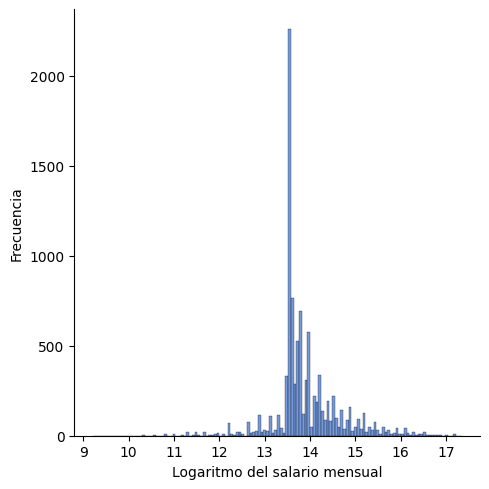

In [57]:
print(data['log_y_salary_m'].describe())
sns.displot(data, x = "log_y_salary_m")
plt.xlabel('Logaritmo del salario mensual')
plt.ylabel('Frecuencia')

In [58]:
data['log_y_salary_m'].describe()

count    9785.000000
mean       13.910491
std         0.751414
min         9.210340
25%        13.568640
50%        13.710150
75%        14.220976
max        17.341871
Name: log_y_salary_m, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


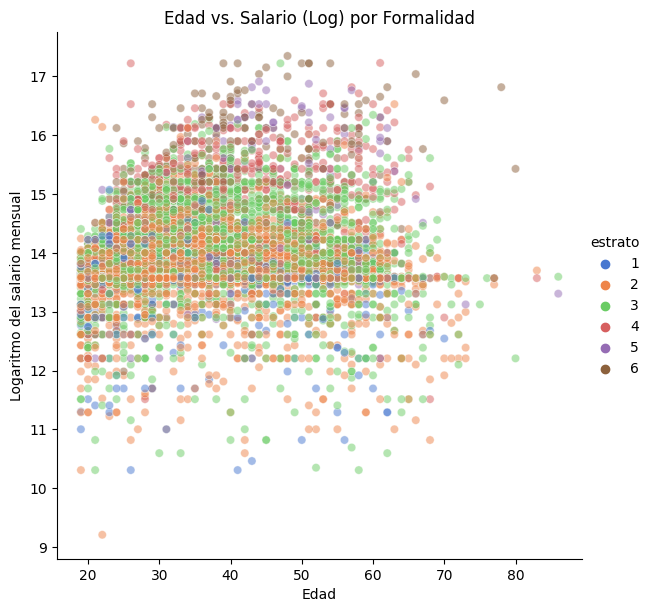

In [59]:
#Comportamiento del ingreso por estrato
plot = sns.relplot(x = "age", y = "log_y_salary_m", hue = "estrato",
            alpha = 0.5, palette = "muted",
            height = 6, data = data)

plt.xlabel('Edad')
plt.ylabel('Logaritmo del salario mensual')
plt.title('Edad vs. Salario (Log) por Formalidad')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.6805555555555554, 0.5, 'Frecuencia')

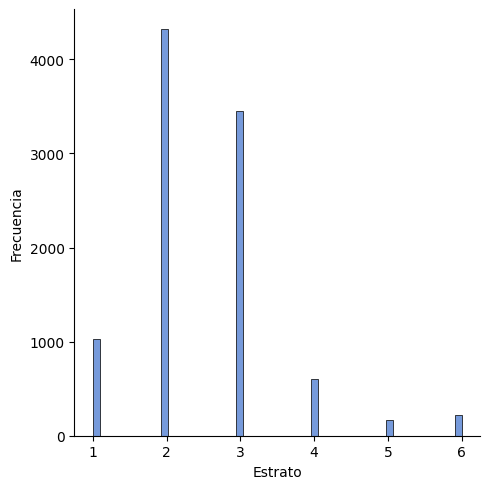

In [60]:
#Lo anterior es complicado de leer, miraremos un poco más al detalle el estrato
sns.displot(data, x = "estrato")
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')

In [61]:
#Miramos el valor promedio de salario en nuestros ciclos de vida
data.groupby('estrato')['log_y_salary_m'].agg(['mean', 'std'])

,mean,std
estrato,,
1,13.589334,0.529374
2,13.709045,0.525787
3,13.954643,0.697903
4,14.820373,0.872960
5,14.926072,1.133646
6,15.403223,1.049108


In [62]:
# Test de normalidad Shapiro-Wilk
pg.normality(data = data, dv = 'log_y_salary_m', group = 'estrato')
#No hay normalidad, por lo que anova puede no ser robusto

,W,pval,normal
estrato,,,
2,0.839787,0.000000e+00,False
3,0.934202,1.368038e-36,False
4,0.982570,1.371226e-06,False
1,0.754094,1.889813e-36,False
5,0.953987,2.725419e-05,False
6,0.956025,2.665410e-06,False


In [63]:
pg.anova(data = data, dv = 'log_y_salary_m', between = 'estrato', detailed = True)

#el valor de p-unc sugiere que al menos una de las medias de estrato es significativamente diferente de las demás
#el valor de eta cuadrado parcial (np2) de 0.262442 sugiere que estrato explica una 
#proporción significativa de la variabilidad total en 'log_y_salary_m'
#en resumen, estrato es relevante para explicar el log del salario


,Source,SS,DF,MS,F,p-unc,np2
0,estrato,1449.799654,5,289.959931,695.923833,0.0,0.262442
1,Within,4074.466238,9779,0.416655,NaN,NaN,NaN


In [64]:
dif_no_par = kruskal(*[group['log_y_salary_m'] for name, group in data.groupby('estrato')])
print('Estadística de prueba de Kruskal-Wallis:', dif_no_par.statistic)
print('Valor p:', dif_no_par.pvalue)

#Con este pvalor rechazamos la h nula
#hay diferencias significativas entre al menos un de los grupos

Estadística de prueba de Kruskal-Wallis: 1657.370721025996
Valor p: 0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(41.73866769547324, 0.5, 'Logaritmo del salario mensual')

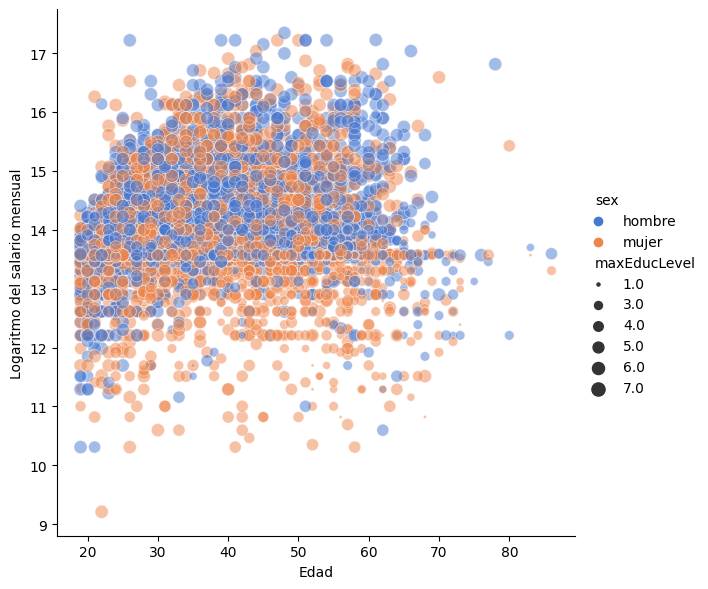

In [65]:
sns.relplot(x = "age", y = "log_y_salary_m", hue = "sex", size = 'maxEducLevel',
            sizes = (5, 90), alpha = 0.5, palette = "muted",
            height = 6, data = data)

plt.xlabel('Edad')
plt.ylabel('Logaritmo del salario mensual')